## Introduction to Data Analysis and Visualisation


In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

**Reading CSV file using panda library**

In [2]:
data = pd.read_csv('pseudo_facebook.csv')

**Checking first and last five rows**
* `.head()`: Observing the first 5 rows 

In [3]:
data.head()

,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,2094382,14,19,1999,11,male,266.0,0,0,0,0,0,0,0,0
1,1192601,14,2,1999,11,female,6.0,0,0,0,0,0,0,0,0
2,2083884,14,16,1999,11,male,13.0,0,0,0,0,0,0,0,0
3,1203168,14,25,1999,12,female,93.0,0,0,0,0,0,0,0,0
4,1733186,14,4,1999,12,male,82.0,0,0,0,0,0,0,0,0


<font color=blue> <b> Practice 1 </b> </font>

In [4]:
# How to retrieve the last 5 rows in dataset




,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
98998,1268299,68,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1256153,18,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1195943,15,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,1468023,23,11,1990,4,female,416.0,2560,185,4506,6516,4506,5760,0,756
99002,1397896,39,15,1974,5,female,397.0,2049,768,9410,12443,9410,9530,0,2913


**Checking the total rows and columns**

In [5]:
print(data.shape)

(99003, 15)


## Data Cleaning
* Clean off null and unnecessary data



**Checking the type of variables**
* `.dtypes` provides the type of variables for each column
* `.info()` provides information of missing values, the data type, number of rows as well as memory usage

In [6]:
# method 1
data.dtypes

userid                     int64
age                        int64
dob_day                    int64
dob_year                   int64
dob_month                  int64
gender                    object
tenure                   float64
friend_count               int64
friendships_initiated      int64
likes                      int64
likes_received             int64
mobile_likes               int64
mobile_likes_received      int64
www_likes                  int64
www_likes_received         int64
dtype: object

In [7]:
# method 2
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
userid                   99003 non-null int64
age                      99003 non-null int64
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   98828 non-null object
tenure                   99001 non-null float64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_likes                99003 non-null int64
www_likes_received       99003 non-null int64
dtypes: float64(1), int64(13), object(1)
memory usage: 11.3+ MB


**Checking of columns name**
* `df.columns.unique()` gives the unique column names. Check if there is unnecessary spaces in the column names and replace it accordingly. 

In [8]:
data.columns.unique()

Index(['userid', 'age', 'dob_day', 'dob_year', 'dob_month', 'gender', 'tenure',
       'friend_count', 'friendships_initiated', 'likes', 'likes_received',
       'mobile_likes', 'mobile_likes_received', 'www_likes',
       'www_likes_received'],
      dtype='object')

In [9]:
# convert gender to categorical variable
data['gender'] = data['gender'].astype('category')

<font color=blue> <b> Practice 2 </b> </font>

In [10]:
# Convert variable ‘age’ into float64 




In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99003 entries, 0 to 99002
Data columns (total 15 columns):
userid                   99003 non-null int64
age                      99003 non-null float64
dob_day                  99003 non-null int64
dob_year                 99003 non-null int64
dob_month                99003 non-null int64
gender                   98828 non-null category
tenure                   99001 non-null float64
friend_count             99003 non-null int64
friendships_initiated    99003 non-null int64
likes                    99003 non-null int64
likes_received           99003 non-null int64
mobile_likes             99003 non-null int64
mobile_likes_received    99003 non-null int64
www_likes                99003 non-null int64
www_likes_received       99003 non-null int64
dtypes: category(1), float64(2), int64(12)
memory usage: 10.7 MB


**Checking of null data**

In [12]:
data.isnull().sum()

userid                     0
age                        0
dob_day                    0
dob_year                   0
dob_month                  0
gender                   175
tenure                     2
friend_count               0
friendships_initiated      0
likes                      0
likes_received             0
mobile_likes               0
mobile_likes_received      0
www_likes                  0
www_likes_received         0
dtype: int64

**Removal of null data**

In [13]:
data.dropna(how='any', inplace=True)

Parameter: how{‘any’, ‘all’}, default ‘any’
* ‘any’ : If any NA values are present, drop that row or column.
* ‘all’ : If all values are NA, drop that row or column.

In [14]:
data.isnull().sum()

userid                   0
age                      0
dob_day                  0
dob_year                 0
dob_month                0
gender                   0
tenure                   0
friend_count             0
friendships_initiated    0
likes                    0
likes_received           0
mobile_likes             0
mobile_likes_received    0
www_likes                0
www_likes_received       0
dtype: int64

In [15]:
data.notnull().sum()

userid                   98826
age                      98826
dob_day                  98826
dob_year                 98826
dob_month                98826
gender                   98826
tenure                   98826
friend_count             98826
friendships_initiated    98826
likes                    98826
likes_received           98826
mobile_likes             98826
mobile_likes_received    98826
www_likes                98826
www_likes_received       98826
dtype: int64

**Removal of unnecessary columns**
* Since there is age given, the information on dob_day,dob_year and dob_month are unnecessary. The userid is not important as well.

In [16]:
data1 = data.drop(['userid','dob_day','dob_month','dob_year'],axis = 1) 

* axis = 1 indicates drop the whole column

In [17]:
data1.head()

,age,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,14.0,male,266.0,0,0,0,0,0,0,0,0
1,14.0,female,6.0,0,0,0,0,0,0,0,0
2,14.0,male,13.0,0,0,0,0,0,0,0,0
3,14.0,female,93.0,0,0,0,0,0,0,0,0
4,14.0,male,82.0,0,0,0,0,0,0,0,0


<font color=blue> <b> Practice 3 </b> </font>

In [18]:
# drop first row of the dataset


# drop first 10 row of the dataset
 

# drop row 20 and 22 of the dataset


# perform head count


,age,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,14.0,male,266.0,0,0,0,0,0,0,0,0
1,14.0,female,6.0,0,0,0,0,0,0,0,0
2,14.0,male,13.0,0,0,0,0,0,0,0,0
3,14.0,female,93.0,0,0,0,0,0,0,0,0
4,14.0,male,82.0,0,0,0,0,0,0,0,0
5,14.0,male,15.0,0,0,0,0,0,0,0,0
6,13.0,male,12.0,0,0,0,0,0,0,0,0
7,13.0,female,0.0,0,0,0,0,0,0,0,0
8,13.0,male,81.0,0,0,0,0,0,0,0,0
9,13.0,male,171.0,0,0,0,0,0,0,0,0


<font color=blue> <b> Practice 4 </b> </font>

In [19]:
# drop first 10 row of the dataset



,userid,age,dob_day,dob_year,dob_month,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
98996,1668695,24.0,25,1989,4,female,182.0,2938,1272,6018,17765,5843,11708,175,6057
98997,1458985,28.0,14,1985,12,female,290.0,2218,1618,4626,10268,4290,4250,336,6018
98998,1268299,68.0,4,1945,4,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,1256153,18.0,12,1995,3,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,1195943,15.0,10,1998,5,female,111.0,2002,1524,11959,12554,11959,11462,0,1092


**Summary of data**
* `.describe()`:
* For variables that are float64 or int64, it will provide a statistical summaries of the variables, including `count`,`mean`,`std`,`min`,`25%`,`50%`,`75%` and `max`
* For categorical variables it will provide information like `count`, `unique`,`top` and `freq`

In [20]:
data1.describe()

,age,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
count,98826.000000,98826.000000,98826.000000,98826.000000,98826.000000,98826.000000,98826.000000,98826.000000,98826.000000,98826.000000
mean,37.212646,535.649758,196.374031,107.480056,156.111762,142.665432,106.147846,84.118835,49.963866,58.546557
std,22.524220,454.258423,387.463475,188.861581,572.553504,1388.990063,445.494703,840.543366,285.751489,601.880496
min,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,226.000000,31.000000,17.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,28.000000,412.000000,82.000000,46.000000,11.000000,8.000000,4.000000,4.000000,0.000000,2.000000
75%,50.000000,673.000000,206.000000,117.000000,81.000000,59.000000,46.000000,33.000000,7.000000,20.000000
max,113.000000,3139.000000,4923.000000,4144.000000,25111.000000,261197.000000,25111.000000,138561.000000,14865.000000,129953.000000


In [21]:
data1['gender'].describe()

count     98826
unique        2
top        male
freq      58574
Name: gender, dtype: object

* `count`: total no. of data points for this category variable  
* `unique`: no. of different levels for this category variable (E.g. 2 for male & female)  
* `top`: level with the maximum occurance  
* `freq`: no. of times of occurance of the 'top' level

In [22]:
data1['gender'].value_counts()

male      58574
female    40252
Name: gender, dtype: int64

## Data Exploration and Manipulation
* Use of conditional filter
* Adding columns to existing DataFrame
* Joining dataframes
* Groupby


**Conditional filter** : filter by age
* Teenagers: <18
* Young Adults: Between 18 to 25
* Adults: Between 26 to 35
* Middle Aged Adults: Between 36 to 50
* Older Adults: Between 51 to 60
* Senior citizen: Above 60 

In [23]:
# creating filters conditions
teenager = (data1['age'] <18)
young_adult = (data1['age']>= 18) & (data1['age']<= 25)
adult = (data1['age']>= 26) & (data1['age']<= 35)
middle_age = (data1['age']>= 36) & (data1['age']<= 50)
older_adult = (data1['age']>= 51) & (data1['age']<= 60)
senior_citizen = (data1['age'] >60)

* & : AND
* | : OR
* == : equal to 
* != : not equal to 

Additional information: https://www.w3schools.com/python/python_operators.asp

In [24]:
data2 = pd.DataFrame(data1.loc[teenager])
data3 = pd.DataFrame(data1.loc[young_adult])
data4 = pd.DataFrame(data1.loc[adult])
data5 = pd.DataFrame(data1.loc[middle_age])
data6 = pd.DataFrame(data1.loc[older_adult])
data7 = pd.DataFrame(data1.loc[senior_citizen])

<font color=blue> <b> Practice 5 </b> </font>

In [25]:
# create group1: age not equal to 18
group1 = 
group1

# create a new dataframe for this group 
df1 = 
df1

,age,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,14.0,male,266.0,0,0,0,0,0,0,0,0
1,14.0,female,6.0,0,0,0,0,0,0,0,0
2,14.0,male,13.0,0,0,0,0,0,0,0,0
3,14.0,female,93.0,0,0,0,0,0,0,0,0
4,14.0,male,82.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
98997,28.0,female,290.0,2218,1618,4626,10268,4290,4250,336,6018
98998,68.0,female,541.0,2118,341,3996,18089,3505,11887,491,6202
99000,15.0,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,23.0,female,416.0,2560,185,4506,6516,4506,5760,0,756


In [26]:
# Alternatively
# to create a group that only contains female user
df2 = data1[data1.gender != 'male']
df2

,age,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
1,14.0,female,6.0,0,0,0,0,0,0,0,0
3,14.0,female,93.0,0,0,0,0,0,0,0,0
7,13.0,female,0.0,0,0,0,0,0,0,0,0
14,13.0,female,0.0,0,0,0,0,0,0,0,0
15,13.0,female,16.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...
98998,68.0,female,541.0,2118,341,3996,18089,3505,11887,491,6202
98999,18.0,female,21.0,1968,1720,4401,13412,4399,10592,2,2820
99000,15.0,female,111.0,2002,1524,11959,12554,11959,11462,0,1092
99001,23.0,female,416.0,2560,185,4506,6516,4506,5760,0,756


**Adding new column 'age group'**


In [27]:
data2.insert(1, "age group", 'teenager')
data3.insert(1, "age group", 'young adult')
data4.insert(1, "age group", 'adult')
data5.insert(1, "age group", 'middle aged')
data6.insert(1, "age group", 'older adult')
data7.insert(1, "age group", 'senior citizen')

In [28]:
data2.head()

,age,age group,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,14.0,teenager,male,266.0,0,0,0,0,0,0,0,0
1,14.0,teenager,female,6.0,0,0,0,0,0,0,0,0
2,14.0,teenager,male,13.0,0,0,0,0,0,0,0,0
3,14.0,teenager,female,93.0,0,0,0,0,0,0,0,0
4,14.0,teenager,male,82.0,0,0,0,0,0,0,0,0


### Merging dataframes together


In [29]:
data_Final = data2.append([data3,data4,data5,data6,data7])
data_Final

,age,age group,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
0,14.0,teenager,male,266.0,0,0,0,0,0,0,0,0
1,14.0,teenager,female,6.0,0,0,0,0,0,0,0,0
2,14.0,teenager,male,13.0,0,0,0,0,0,0,0,0
3,14.0,teenager,female,93.0,0,0,0,0,0,0,0,0
4,14.0,teenager,male,82.0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
98911,68.0,senior citizen,female,847.0,2683,423,3008,1442,3008,589,0,853
98923,103.0,senior citizen,female,560.0,3018,547,5595,1926,586,810,5009,1116
98934,108.0,senior citizen,female,954.0,3982,1190,6016,4012,1180,2816,4836,1196
98975,107.0,senior citizen,male,328.0,3748,396,6203,19674,3667,17624,2536,2050


**Merging by column**
* To demo merging by column `'dob_year'`  from original data

In [30]:
x = pd.DataFrame(data['dob_year'])
result = pd.concat([data_Final, x], axis=1)
result

,age,age group,gender,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received,dob_year
0,14.0,teenager,male,266.0,0,0,0,0,0,0,0,0,1999
1,14.0,teenager,female,6.0,0,0,0,0,0,0,0,0,1999
2,14.0,teenager,male,13.0,0,0,0,0,0,0,0,0,1999
3,14.0,teenager,female,93.0,0,0,0,0,0,0,0,0,1999
4,14.0,teenager,male,82.0,0,0,0,0,0,0,0,0,1999
...,...,...,...,...,...,...,...,...,...,...,...,...,...
98998,68.0,senior citizen,female,541.0,2118,341,3996,18089,3505,11887,491,6202,1945
98999,18.0,young adult,female,21.0,1968,1720,4401,13412,4399,10592,2,2820,1995
99000,15.0,teenager,female,111.0,2002,1524,11959,12554,11959,11462,0,1092,1998
99001,23.0,young adult,female,416.0,2560,185,4506,6516,4506,5760,0,756,1990


### Groupby age group and gender to find statistical summary

In [31]:
data_Final.groupby(by='gender').std()

,age,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
gender,,,,,,,,,,
female,23.004685,491.572050,476.050263,195.143574,728.520864,2041.668144,555.301534,1249.222763,384.028619,864.808969
male,22.056195,423.103846,308.466702,184.292570,419.339616,613.921860,343.191804,339.162199,186.598445,307.943985


In [32]:
data_Final.groupby(by='gender').median()

,age,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
gender,,,,,,,,,,
female,31.0,438.0,96,49,39,29,16,15,0,9
male,27.0,393.0,74,44,5,4,2,2,0,1


In [33]:
data_Final.groupby(by='gender').mean()

,age,tenure,friend_count,friendships_initiated,likes,likes_received,mobile_likes,mobile_likes_received,www_likes,www_likes_received
gender,,,,,,,,,,
female,39.457120,587.229231,241.977368,113.90244,260.061065,251.445965,172.921097,147.107597,87.139869,104.338269
male,35.670246,500.204391,165.035459,103.06660,84.677895,67.911548,60.261328,40.833015,24.416550,27.078533


In [34]:
data_Final.groupby(by='gender').describe()

age                                                        tenure  \
          count       mean        std   min   25%   50%   75%    max    count   
gender                                                                          
female  40252.0  39.457120  23.004685  13.0  21.0  31.0  54.0  113.0  40252.0   
male    58574.0  35.670246  22.056195  13.0  20.0  27.0  45.0  113.0  58574.0   

                    ... www_likes          www_likes_received              \
              mean  ...       75%      max              count        mean   
gender              ...                                                     
female  587.229231  ...      25.0  14865.0            40252.0  104.338269   
male    500.204391  ...       2.0  12903.0            58574.0   27.078533   

                                                   
               std  min  25%  50%   75%       max  
gender                                             
female  864.808969  0.0  1.0  9.0  56.0  129953.0  
male    307.943985  0.0  0.0  1.0   8.0   39213.0  

[2 rows x 80 columns]

# Data visualisation
**Python libraries for data visualisation: matplotlib.pyplot & seaborn**  
**1. Data visualisation for single variable**  
**2. Data visualisation for two or multiple variables**

## Data visualisation for single variable

**A. Countplot (For categorical variables)**

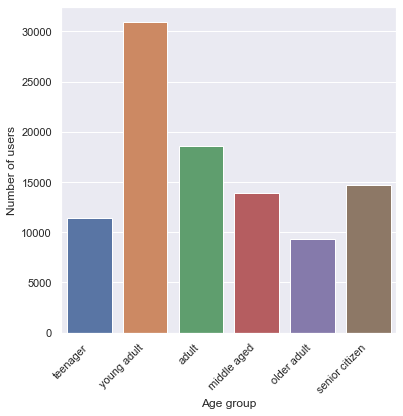

In [35]:
# Count plot using seaborn
f, axes = plt.subplots(1, 1, figsize=(6, 6))
count = sb.countplot(x="age group", data=data_Final )
count.set(xlabel='Age group', ylabel='Number of users')
count.set_xticklabels(count.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

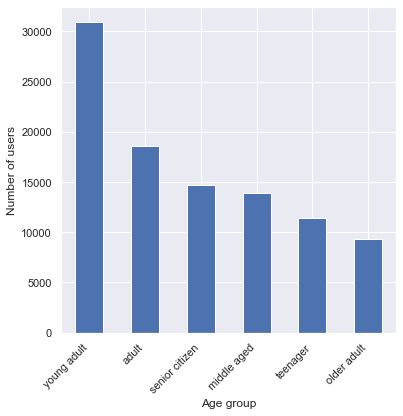

In [36]:
# Countplot using matplotlib
f, axes = plt.subplots(1, 1, figsize=(6, 6))
chart = data_Final['age group'].value_counts().plot(kind='bar')
plt.ylabel('Number of users')
plt.xlabel('Age group')
chart.set_xticklabels(chart.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

**B. Histogram (For numerical variables)**

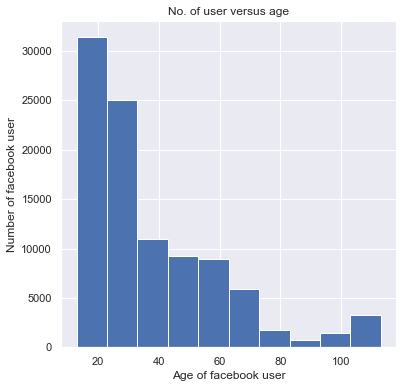

In [37]:
# Histogram
f, axes = plt.subplots(1, 1, figsize=(6, 6))
plt.hist(data_Final['age'])
plt.ylabel('Number of facebook user')
plt.xlabel('Age of facebook user')
plt.title('No. of user versus age')
plt.show()

**C. Boxplot**

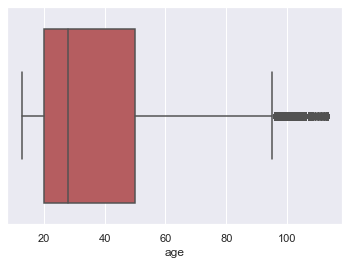

In [38]:
# Boxplot
f, axes = plt.subplots(1, 1, figsize=(6, 4))
sb.boxplot(data_Final['age'], orient = "h", color = 'r')

**D. Distribution plot**

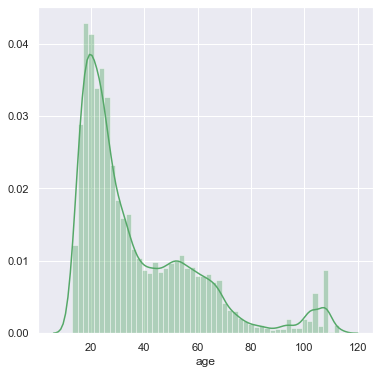

In [39]:
# Distribution plot
f, axes = plt.subplots(1, 1, figsize=(6, 6))
sb.distplot(data_Final['age'], color = 'g')

**E. Violin plot**

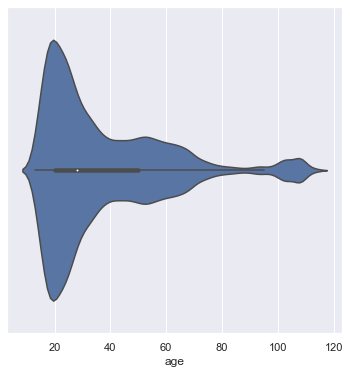

In [40]:
# Violin plot
f, axes = plt.subplots(1, 1, figsize=(6, 6))
sb.violinplot(data_Final['age'], color = 'b')

<font color=blue> <b> Practice 6 </b> </font>   
Create a boxplot for the variable `tenure` by changing the size (adjust 'figsize' at canvas) and color.

Color code:
Black = 'k' ; 
Blue = 'b' ; 
Red = 'r' ; 
Green = 'g' ; 
Yellow = 'y' ; 
Cyan = 'c' ; 
Magenta = 'm'

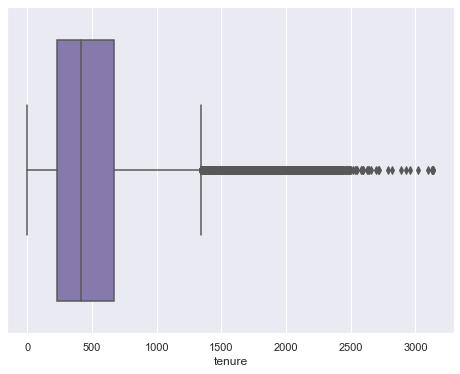

## Data visualisation for two variables
**Between 2 numerical variables**  
**A. Scatterplot**

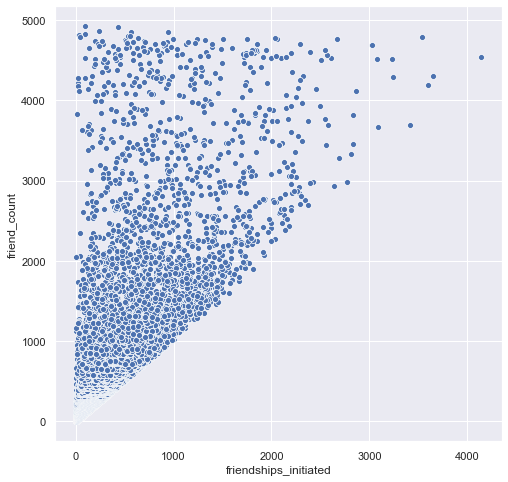

In [42]:
# Scatterplot
f, axes = plt.subplots(1, 1, figsize=(8, 8))
sb.scatterplot(data=data_Final, x='friendships_initiated', y='friend_count')

**B. Jointplot**

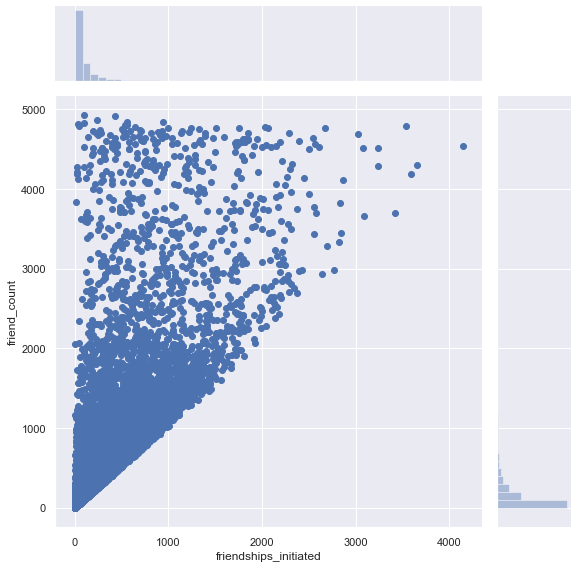

In [43]:
sb.jointplot(data=data_Final, x='friendships_initiated', y='friend_count', height=8)

**Between a categorical variable and a numerical variable**  
**C. Catplot**

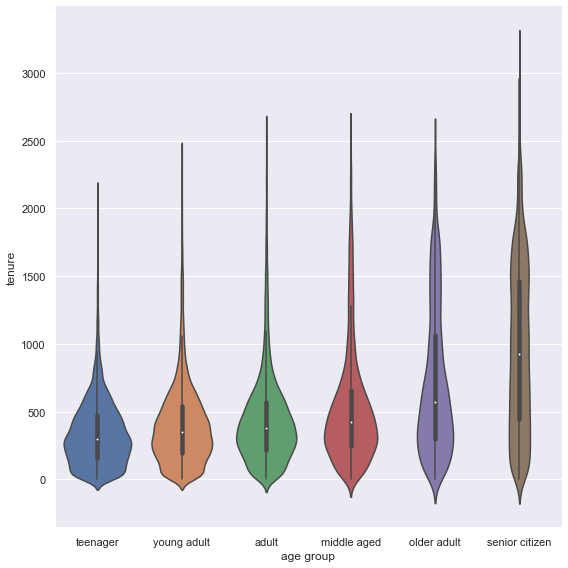

In [44]:
sb.catplot(x = 'age group', y = 'tenure' , data = data_Final, kind = "violin", height = 8)

<font color=blue> <b> Practice 7 </b> </font>   
Create a catplot between `gender` and `tenure` by changing the attribute 'kind' to 'box' and see the difference.

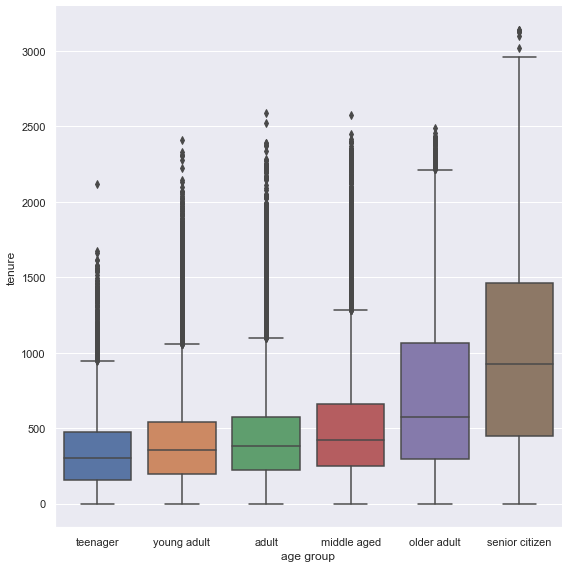

### Data Visualisation (For multiple variables)

In [46]:
data_Final_multi = pd.DataFrame(data_Final[['age', 'tenure', 'friend_count', 'friendships_initiated', 'likes','likes_received']])
data_Final_multi.head()

,age,tenure,friend_count,friendships_initiated,likes,likes_received
0,14.0,266.0,0,0,0,0
1,14.0,6.0,0,0,0,0
2,14.0,13.0,0,0,0,0
3,14.0,93.0,0,0,0,0
4,14.0,82.0,0,0,0,0


**A. Heatmap**

(6, 0)

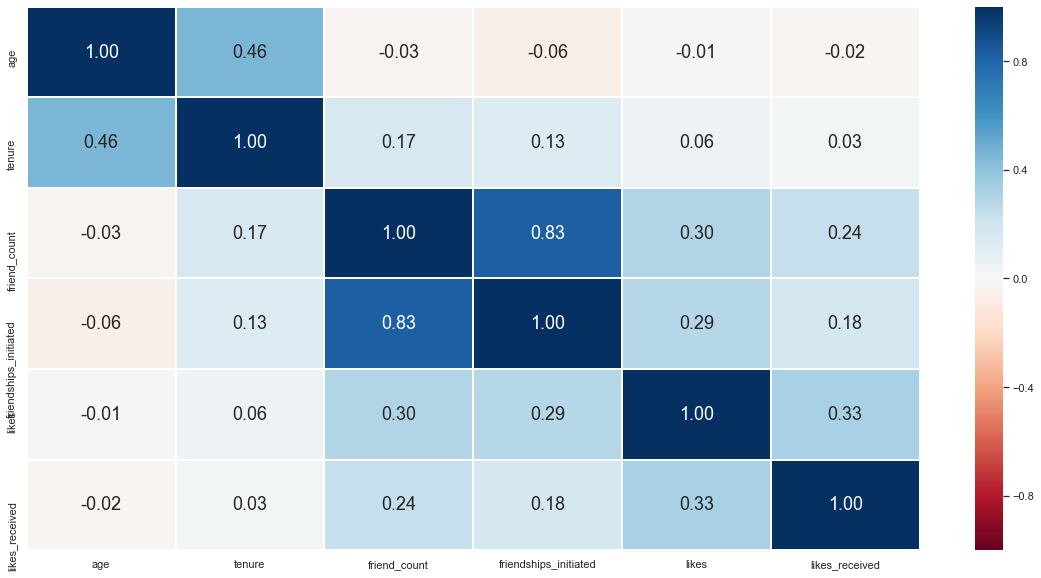

In [47]:
f, axes = plt.subplots(1, 1, figsize=(20, 10))

sb.heatmap(data_Final_multi.corr(), vmin = -1, vmax = 1, linewidths = 1,
           annot = True, fmt = ".2f", annot_kws = {"size": 18}, cmap = "RdBu")
axes.set_ylim(data_Final_multi.shape[1], 0) 

This overview heatmap allows us to see the the correlation between all the variables that are in the dataset. 
* Positive correlation means when one variable increases, the other will increase as well
* Negative correlation means when one variable increases, the other will decrease

**B. Pairplot**

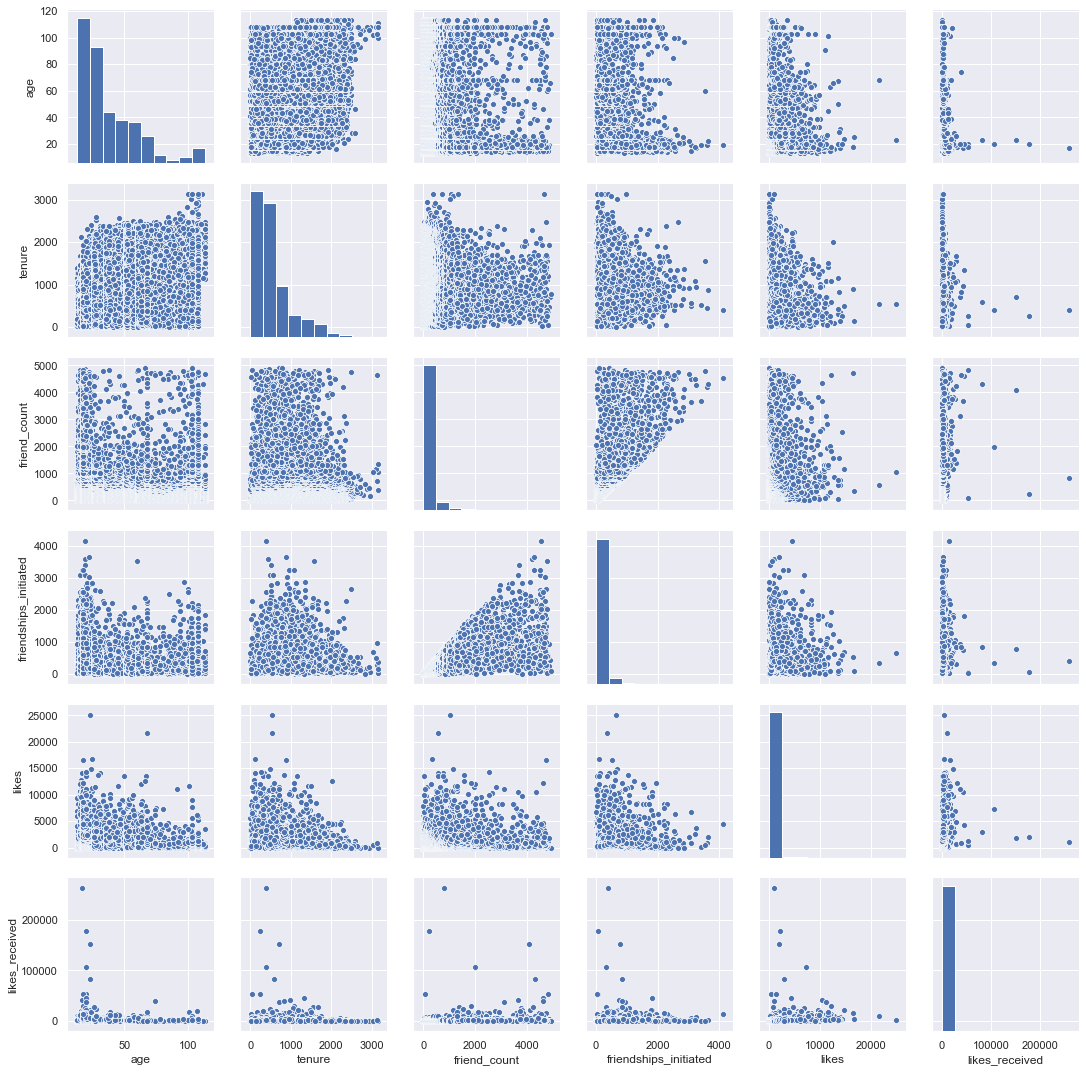

In [48]:
sb.pairplot(data = data_Final_multi)

## Additional Information

Note: In order to perform following, please make sure you have upgrade your seaborn to version 0.11.0

### 1. Age vs Tenure

In [49]:
# Combine a distribution plot and a FacetGrid 
sb.displot(data_Final, x='tenure', col="age group", multiple="dodge")

AttributeError: module 'seaborn' has no attribute 'displot'

In [ ]:
sb.displot(data_Final, x='tenure', hue='age group', multiple='stack')

In [ ]:
sb.displot(data_Final, x='tenure', hue='age group', element='poly')

In [ ]:
sb.displot(data_Final, x='tenure', col="gender", multiple="dodge")

In [ ]:
age_tenure=pd.DataFrame(data_Final[['age','tenure']])

To extract age and tenure from the data set

In [ ]:
sb.catplot(y = 'age', data = age_tenure, kind = "count", height = 20)

From the catplot, we are able to the there are 2 distint group of user ranging from 13-30 years old and 40-70 years old.

In [ ]:
age_tenure1 = age_tenure[age_tenure['age'] < 30 ]

In [ ]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'age', y = 'tenure', data = age_tenure1)

In [ ]:
age_tenure2 = age_tenure[age_tenure['age'].between(39, 71, inclusive=False)]

In [ ]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'age', y = 'tenure', data = age_tenure2)

### 2. www_like & mobile_likes vs total likes

In [ ]:
likesData = pd.DataFrame(data[['mobile_likes', 'www_likes', 'mobile_likes_received', 'www_likes_received', 'likes']])
likesData.head()

In [ ]:
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "mobile_likes", y = "likes", data = likesData)

In [ ]:
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "www_likes", y = "likes", data = likesData)


In [ ]:
f, axes = plt.subplots(1, 1, figsize=(16,8))
plt.scatter(x = "www_likes", y = "likes", data = likesData)

The two scatter plot for both the mobile likes and www likes against the total likes shows us which medium has a higher usage. Mobile likes and total likes sees more of their likes within a larger region and hence, we can briefly conclude that more users interacts with the like button from their mobile.

(explanation for this is uncertain, open for discussion and changes)

### 3. Interactive Visualisation

In [ ]:
import plotly.offline as py
import plotly.graph_objs as go
import plotly.express as px

In [ ]:
trace = go.Histogram(x = data_Final['age group'], histnorm = 'density')
layout = go.Layout(title = 'Number of Facebook users')
data = [trace]
fig = go.Figure(data = data, layout = layout)
py.iplot(fig)

# can compare with the non-interactive plot

In [ ]:
fig = px.box(data_Final,x='gender',y='likes_received')
fig.show()